In [1]:
# Load the web_events.csv data set into a Pandas dataframe.
# Convert the values in the timestamp field to datetimes.
# Extract different time units from the timestamp field.
# Aggregate on each one, counting the number of records, and see what insights you can discover for each type of event.
# Round datetimes by hour, aggregate, and see what insights you can discover.
# Load the life_expectancy.csv data set into a Pandas dataframe.
# Transform/melt the data so that the years are listed in a single column instead of separate columns.
# Practice address missing values for countries using the different approaches (imputation, interpolation, and deletion).

In [2]:
from datetime import datetime as dt
from datetime import timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
events = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/web_events.csv')

In [4]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [5]:
events['date'] = pd.to_datetime(events['timestamp'], unit='ms')
events.head()

,timestamp,visitorid,event,itemid,transactionid,date
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106


In [6]:
events['quarter'] = events['date'].dt.quarter
events['weekday'] = events['date'].dt.weekday
events['month'] = events['date'].dt.month
events['hour'] = events['date'].dt.hour

[]

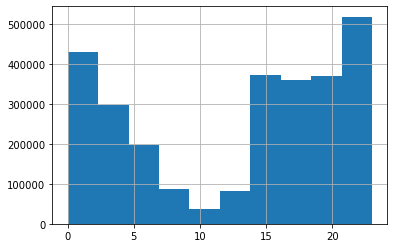

In [7]:
events['hour'].hist()
plt.plot()

[]

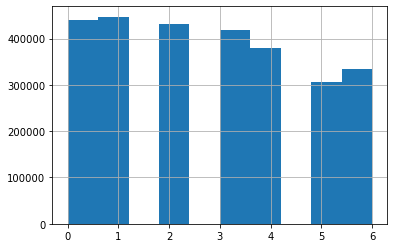

In [8]:
events['weekday'].hist()
plt.plot()

[]

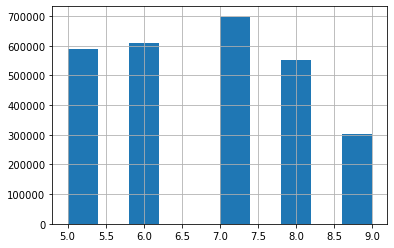

In [9]:
events['month'].hist()
plt.plot()

In [10]:
events['date_hr'] = events['date'].dt.round('H')
events

,timestamp,visitorid,event,itemid,transactionid,date,quarter,weekday,month,hour,date_hr
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,2,1,6,5,2015-06-02 05:00:00
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,2,1,6,5,2015-06-02 06:00:00
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,2,1,6,5,2015-06-02 05:00:00
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,2,1,6,5,2015-06-02 05:00:00
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,2,1,6,5,2015-06-02 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01 03:13:05.939,3,5,8,3,2015-08-01 03:00:00
2756097,1438399813142,762376,view,115946,NaN,2015-08-01 03:30:13.142,3,5,8,3,2015-08-01 04:00:00
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01 02:57:00.527,3,5,8,2,2015-08-01 03:00:00
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01 03:08:50.703,3,5,8,3,2015-08-01 03:00:00


In [11]:
life = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/life_expectancy.csv')

In [12]:
life.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
ids = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

In [14]:
melt_fields = set(life.columns) - set(ids)
melt_fields

{'1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016'}

In [15]:
melt_df = pd.melt(life, id_vars=ids, value_vars=melt_fields, var_name='year', value_name='life_expect')
melt_df

,Country Name,Country Code,Indicator Name,Indicator Code,year,life_expect
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1989,73.425
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1989,49.028
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1989,41.572
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1989,71.860
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1989,NaN
...,...,...,...,...,...,...
15043,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1975,NaN
15044,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1975,45.620
15045,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1975,57.075
15046,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1975,51.089


In [16]:
melt_df[melt_df['life_expect'].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,year,life_expect
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1989,NaN
9,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1989,NaN
25,Bermuda,BMU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1989,NaN
49,Curacao,CUW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1989,NaN
50,Cayman Islands,CYM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1989,NaN
...,...,...,...,...,...,...
15008,Seychelles,SYC,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1975,NaN
15010,Turks and Caicos Islands,TCA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1975,NaN
15027,Tuvalu,TUV,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1975,NaN
15037,British Virgin Islands,VGB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1975,NaN


In [17]:
# imputation
mean_df = melt_df['life_expect'].fillna(melt_df['life_expect'].mean())
mean_df[25]

63.544405694009434

In [18]:
# interpolation
#front_df = melt_df['life_expect'].fillna(method='ffill')
front_df = melt_df.groupby('Country Name')['life_expect'].apply(lambda x: x.fillna(method='ffill'))
front_df[25]

nan

In [19]:
# deletion
drop_df = melt_df['life_expect'].dropna()
drop_df

0        73.42500
1        49.02800
2        41.57200
3        71.86000
5        63.88933
           ...   
15042    57.28100
15044    45.62000
15045    57.07500
15046    51.08900
15047    56.73300
Name: life_expect, Length: 13747, dtype: float64